In [20]:
# TODO: remember about preemphasis/deemphasis!
import numpy as np
import os
from lpc.coding import *
from lpc.utils import dump_audio, get_audio, record_audio
from utils import butter_lowpass_filter, plot_audio

fs = 44100
window_len = int(240 / 8000 * fs)
window_step = int(180 / 8000 * fs)
bt_min_f, bt_max_f = 100, 400
n_coef = 10

encoder = Encoder(window_len, window_step, n_coef, bt_min_f, bt_max_f, fs)
decoder = Decoder(window_step, n_coef)

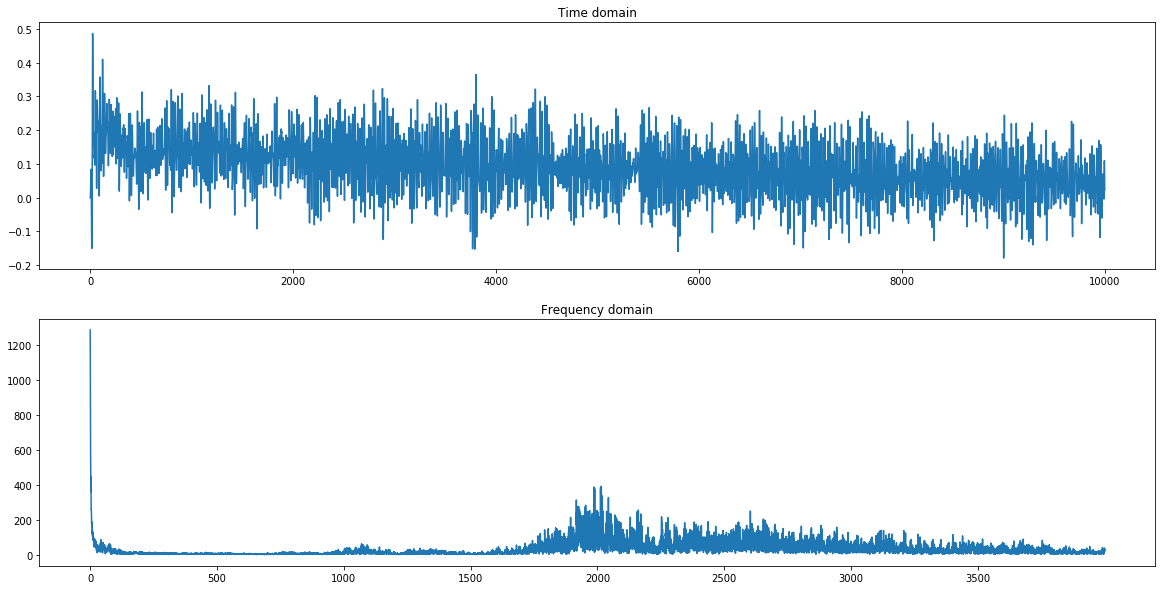

In [21]:
audio_dir = os.path.join('.', '..', 'audio')
fs = 44100
f_min = 0
f_max = 4000

test_path = os.path.join(audio_dir, 'sz.wav')
if not os.path.exists(test_path):
    audio = record_audio(5, sample_rate=fs)
    dump_audio(audio, test_path)
else:
    audio = get_audio(test_path)
    
left, right = audio[:, 0], audio[:, 1]
cutoff_freq = f_max
left_lp = butter_lowpass_filter(left, cutoff_freq, sample_rate=fs).astype(np.double)
    
plot_audio(left_lp)

In [22]:
enc = encoder.encode(left_lp)
dec = decoder.decode(enc)
dump_audio(dec, os.path.join(audio_dir, 'sz_decomp.wav'), fs)

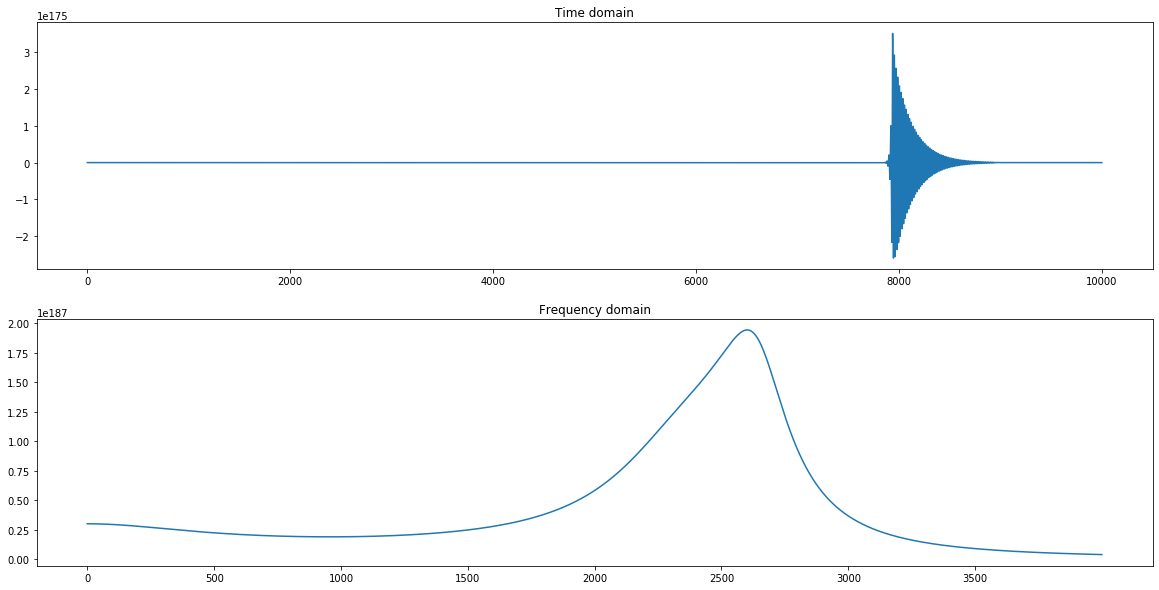

In [26]:
plot_audio(dec)